<a href="https://colab.research.google.com/github/jess-mackay/Salifort_Motors_project/blob/main/Activity__Course_7_Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Providing data-driven suggestions for HR**

## Description

This is the capstone project for the Google Advanced Data Analytics Professional Certificate. It includes questions and prompts provided in the project, along with my answers and my code.


## Scenario

You are a data professional working for Salifort Motors.

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees.

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution.

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure.

After you choose an approach, you need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team.

### The HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below.

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Questions for the planning stage.

Q:  Who are your stakeholders for this project?

A: The main stakeholder is the Salifort Motors HR department. The insights will also be of interest to the management team and shareholders in the company, as employee retention is important for company revenue.

Q: What are you trying to solve or accomplish?

A: I am trying to determine the main reasons why employees choose to leave the company. The contribution of each driver will be important to help management decide on the changes they need to implement.

Q: What are your initial observations when you explore the data?

A: Many of the variables could help explain why employees leave the company.

Satisfaction is likely a major driver, but the satisfaction might not be always be known by the HR department, so it could be a good idea to create one model including satisfaction and one without it.

Employee performance could also determine whether someone leave — if an employee is told that they are not performing well, they may not feel good about the work they are doing. Also, if an employee is performing poorly, they could be fired.

The number of projects could be interesting — perhaps people like being involved in lots of projects, but perhaps they also feel overwhelmed if they are asked to work on too many projects.

Monthly hours could also be complicated — too few or too many hours could lead to dissatisfaction. I might consider creating a variable defining overtime.

Various factors could lead to company loyaty, e.g., if the employee has been with the company a long time, if they have been promoted, and if they have a good salary.

A workplace accident could lead to someone wanting (or needing) to leave.

Different departments could have different retention rates — it could be interesting to run the analysis for each department separately.

Q: Do you have any ethical considerations in this stage?

A: When working with employee data, it is important that no individual employee could be identified. I can see that the data is already anonymised.

I assume that third-party tools were used for confidential data collection and that informed consent was obtained. (In a real-world situation, I would ask this to make sure).

It is important to ensure diverse representation in training data and test data. There are 15,000 rows in the dataset, so I don't think this will be an issue.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages and functions

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import io

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn import metrics

### Load dataset

Use `Pandas` to read a dataset called **`HR_capstone_dataset.csv`.**

In [ ]:
#from google.colab import files

#uploaded = files.upload()


In [ ]:
df0 = pd.read_csv(io.BytesIO(uploaded['HR_capstone_dataset.csv']))
print(df0)



       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
print("Number of rows and columns:")
print(df0.shape)
print()
print(df0.info())

Number of rows and columns:
(14999, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
print(df0.describe())


       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
print(df0.columns.tolist())


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [ ]:
# Rename columns as needed
df0.rename(columns={'satisfaction_level':'satisfaction', 'last_evaluation': 'evaluation', 'number_project':'projects',
                    'average_montly_hours': 'monthly_hours', 'time_spend_company':'tenure', 'Work_accident':'accident',
                    'left':'left', 'promotion_last_5years': 'promotion', 'Department':'department', 'salary':'salary'}, inplace=True)

# Check the first 10 rows again
df0.head(10)

,satisfaction,evaluation,projects,monthly_hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isna().sum()


,0
satisfaction,0
evaluation,0
projects,0
monthly_hours,0
tenure,0
accident,0
left,0
promotion,0
department,0
salary,0


There are no missing values in the dataset

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates by fetching the number of rows and column before and after dropping duplicates
print(df0.shape)
print()
print(df0.drop_duplicates().shape)

(14999, 10)

(11991, 10)


There are duplicates in the dataset. Investigate further...

In [ ]:
# Inspect some rows containing duplicates as needed
print(df0.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


The last five rows are all duplicates, so lets inspect the tail of the dataset.

In [ ]:
# Inspect the tail of the dataset
print()
print('df0 tail')
print(df0.tail(10))


df0 tail
       satisfaction  evaluation  projects  monthly_hours  tenure  accident  \
14989          0.43        0.57         2            159       3         1   
14990          0.89        0.88         5            228       5         1   
14991          0.09        0.81         6            257       4         0   
14992          0.40        0.48         2            155       3         0   
14993          0.76        0.83         6            293       6         0   
14994          0.40        0.57         2            151       3         0   
14995          0.37        0.48         2            160       3         0   
14996          0.37        0.53         2            143       3         0   
14997          0.11        0.96         6            280       4         0   
14998          0.37        0.52         2            158       3         0   

       left  promotion department salary  
14989     1          0  technical    low  
14990     1          0    support    low  
14

Nothing stands out. The last five rows are all from the 'support' department, so next investigate this department more closely.

In [ ]:
# See how many duplicates are from the support department
df_support = df0[df0['department'] == 'support']
print()
print(df_support.duplicated())
print(df_support.shape)
print()
print(df_support.drop_duplicates().shape)


46       False
47       False
48       False
49       False
50       False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 2229, dtype: bool
(2229, 10)

(1821, 10)


The duplicates are not exclusive to the support department.

With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We will drop them and continue.

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe to check
df1.head(10)

,satisfaction,evaluation,projects,monthly_hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 0, 'Tenure (years)')

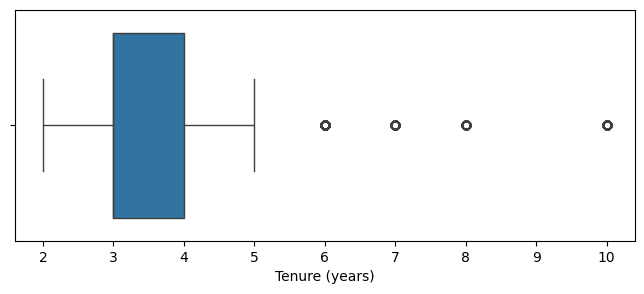

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df1['tenure'])
plt.xlabel("Tenure (years)")

In [ ]:
# Determine if there are outliers by examining points outside upper and lower limits
# Calculate 25th percentile of tenure
percentile25 = df1['tenure'].quantile(0.25)
# Calculate 75th percentile of tenure
percentile75 = df1['tenure'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
print('Upper limit: ', upper_limit)
lower_limit = percentile25 - 1.5 * iqr
print('Lower limit: ', lower_limit)
# Isolate outliers on low end (Boolean mask)
print()
print('Number of rows and columns with outliers:')
df1[df1['tenure'] > upper_limit].shape

Upper limit:  5.5
Lower limit:  1.5

Number of rows and columns with outliers:


(824, 10)

There are 824 outliers. The outliers do not seem to be errors in the data. It is not unreasonable for there to be this many employees that have been at the company for more than 5 years. When I decide which ML model to use, I will have to consider whether the model can handle outliers.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
print('Total')
print(df1.shape)
print()
print('Left')
print(df1[df1['left']==1].shape)
print()
print('Stayed')
print(df1[df1['left']==0].shape)
print()

# Get percentages of people who stayed vs. left
print('Percentage of employees who stayed vs. left')
print(df1['left'].value_counts(normalize=True)*100)

Total
(11991, 10)

Left
(1991, 10)

Stayed
(10000, 10)

Percentage of employees who stayed vs. left
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


Out of 11991 employees surveyed, 1,991 left and 10,000 stayed. The percentage of people who left was 16.6%

### Data visualizations

Investigate correlation among variables.

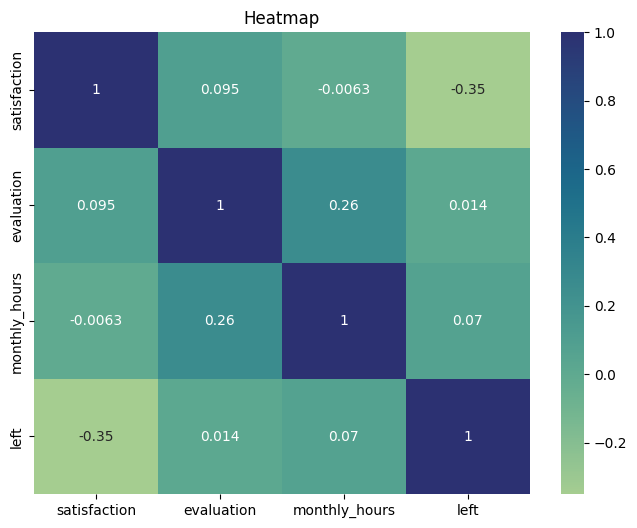

In [ ]:
# Create a heatmap to investiage any correlations among:
# 'satisfaction', 'evaluation', 'monthly_hours', and 'left'.
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['satisfaction', 'evaluation', 'monthly_hours', 'left']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap')
plt.show()


There are no strong correlations among the variables.

Next, explore two variables together: number of projects and monthly hours.

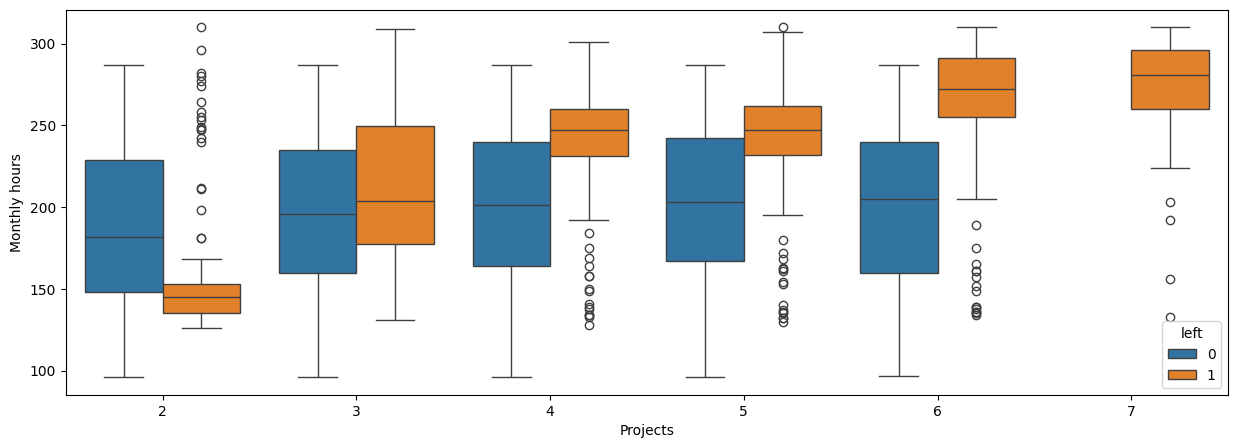

In [ ]:
# Make boxplot for the monthly hours for each number of projects (and distinguish between left vs stayed)
plt.figure(figsize = (15, 5))
p = sns.boxplot(
    data = df1,
    x = 'projects',
    y = 'monthly_hours',
    hue = 'left')

plt.xlabel("Projects")
plt.ylabel("Monthly hours")
plt.show()

People who stayed were either working less hours on few projects or more hours on many projects. All employees working on 7 projects left. I have two hypotheses:

1) People who were not happy or knew they wanted to leave worked less (and then left or were fired)

2) Overwork led to employees feeling dissastified and therefore leaving.

Take a look at whether being in an accident could impact if employees are more liekly to leave.

In [ ]:
# Create a table to view the proportion of people who left depending on if they
# were in a workplace accident
df_leftbyaccident = df1.groupby(['accident'])['left'].mean().reset_index()
df_leftbyaccident

,accident,left
0,0,0.185978
1,1,0.056757


People who were in an accident were less likely to leave.

In [ ]:
# Create a table to view the proportion of people who left depending on if they
# got a promotion
df_leftbypromotion = df1.groupby(['promotion'])['left'].mean().reset_index()
df_leftbypromotion

,promotion,left
0,0,0.168222
1,1,0.039409


Only a small proportion -- 4% -- of employees who got a promotion left.

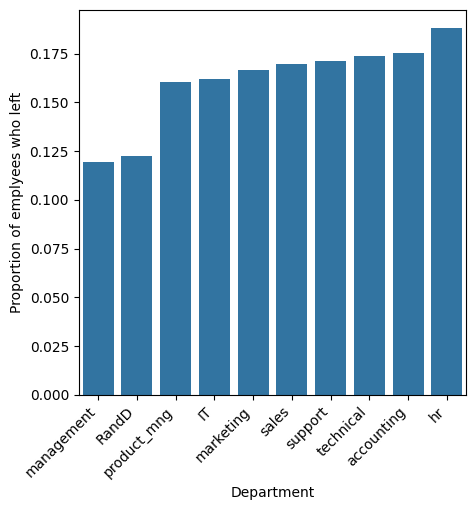

In [ ]:
# Create a plot of the proportion of people who left
# according to department
df_leftbydepartment = df1.groupby(['department'])['left'].mean().reset_index().sort_values('left')
plt.figure(figsize = (5, 5))
p = sns.barplot(
    data = df_leftbydepartment,
    x = 'department',
    y = 'left')
plt.xlabel("Department")
plt.ylabel("Proportion of emplyees who left")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

The HR department had the highest proportion of employees leaving. But there was no department with a particulalry large proportion of employees who left.

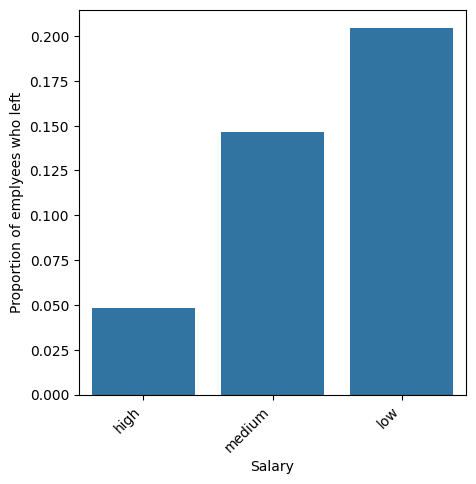

In [ ]:
# Create a plot of the proportion of people who left
# according to salary
df_leftbysalary = df1.groupby(['salary'])['left'].mean().reset_index().sort_values('left')
plt.figure(figsize = (5, 5))
p = sns.barplot(
    data = df_leftbysalary,
    x = 'salary',
    y = 'left')
plt.xlabel("Salary")
plt.ylabel("Proportion of emplyees who left")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

There was a large difference in the proportion of employees leaving between those with high pay and those with low pay.

In [ ]:
# Create a table to view the proportion of people who left
# according to tenure
df_leftbytenure = df1.groupby(['tenure'])['left'].mean().reset_index()
df_leftbytenure

,tenure,left
0,2,0.010653
1,3,0.168401
2,4,0.246883
3,5,0.453861
4,6,0.201107
5,7,0.000000
6,8,0.000000
7,10,0.000000


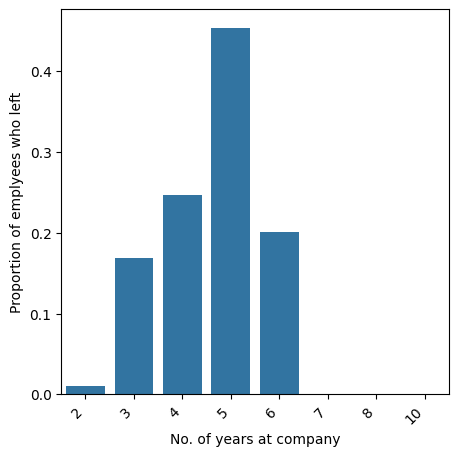

In [ ]:
# Create a plot of the proportion of people who left
# according to tenure
plt.figure(figsize = (5, 5))
p = sns.barplot(
    data = df_leftbytenure,
    x = 'tenure',
    y = 'left')
plt.xlabel("No. of years at company")
plt.ylabel("Proportion of emplyees who left")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Employees who had worked at the company for 5 years were most likely to leave. Perhaps this a time when the company should offer employee growth/learning opportunities.

### Insights from EDA

- There are no obvious correlations among satisfaction, evaluation, monthly_hours, and left
- Only a small proportion of people who were in an accident left
- Promotion may have a small impact on staff leaving
- The HR department had the highest proportion of people who left
- The management and RandD departments had the lowest proportions of people who left
- People with a higher salary were less likely to leave
- Too few or too many projects led to people being more likely to leave
- People who had been at the company for 5 years were most likely to leave

## Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

###Choose the model most appropriate for this task.

Q: What model did you choose:

A: I chose a Random Forest model because it produces stable and accurate predictions, is not prone to overfitting, can handle categorical and numerical data, and can handle outliers. It can also be used to identify feature importance.

Q: Are each of the assumptions met?

A:
1. Independence of Observations: Yes, each data point is a unique employee
2. Sufficient Data and Representative Sampling: Yes, there is data for 11991 employees, 1,991 who left and 10,000 who stayed. This should be sufficient and representative.
3. No Strong Multicollinearity: Yes, features are either not correlated or have low correlation.

### Modeling

Edit features to an appropriate format for the model.

In [ ]:
# Convert categorical features to one-hot encoded features.
  # The drop_first argument can be kept as default (False)
  # during one-hot encoding for random forest models, so it does not need to be specified.
  # Also, the target variable, satisfaction, does not need to be encoded and will be extracted in a later step.
df2 = pd.get_dummies(df1, columns=['department','salary'])
df2.head(10)


,satisfaction,evaluation,projects,monthly_hours,tenure,accident,left,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
5,0.41,0.50,2,153,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
6,0.10,0.77,6,247,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
7,0.92,0.85,5,259,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
8,0.89,1.00,5,224,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
9,0.42,0.53,2,142,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Display variable types to check everything went right
df2.dtypes

,0
satisfaction,float64
evaluation,float64
projects,int64
monthly_hours,int64
tenure,int64
accident,int64
left,int64
promotion,int64
department_IT,bool
department_RandD,bool


Split the data into train, validate, and test sets. Define hyperparameters. Define scoring metrics.

In [ ]:
# Split data
# Separate the dataset into labels (y) and features (X).
y = df2["left"]
X = df2.drop("left", axis=1)

# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)


In [ ]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

Instatiate and fit model.

In [ ]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, scoring=scoring, refit='f1', n_jobs = -1, verbose = 1)

# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [ ]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [ ]:
# Use optimal parameters found using GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 10,
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

# Fit the optimal model.
rf_opt = rf_opt.fit(X_train, y_train)
rf_opt

RandomForestClassifier(max_depth=10, max_samples=0.9, min_samples_split=0.001,
                       random_state=0)

Check model on test set.

In [ ]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

# Get precision, recall, accuracy, and F1 scores.
pc_test = metrics.precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
rc_test = metrics.recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
ac_test = metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
f1_test = metrics.f1_score(y_test, y_pred)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.975
The recall score is 0.924
The accuracy score is 0.984
The F1 score is 0.949


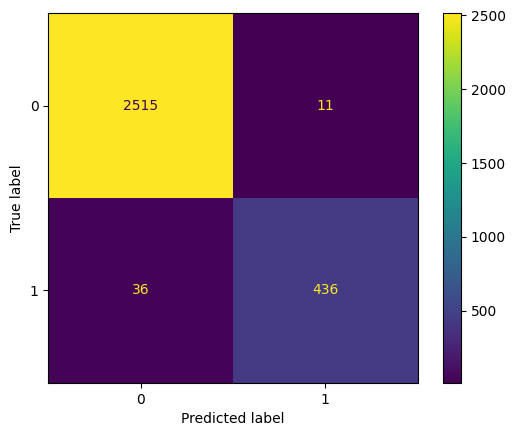

In [ ]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_opt.classes_)

# Plot the visual in-line.
disp.plot()

The model has high precision, accurace, recall and F1 scores. The confusion matrix also shows that the model has high predictive power.

**Determine which features are the most important.**

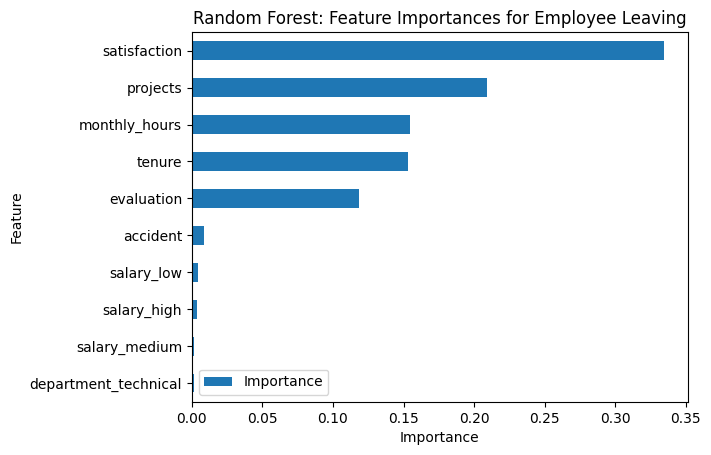

In [ ]:
# Get feature importances
feat_impt = rf_opt.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Insights and future directions

Q: What key insights emerged from your model(s)?

A: Employee satisfaction, number of projects, and monthly hours were the major contributers to whether an employee leaves.

Q: What business recommendations do you propose based on the models built?

A: The company should cap the number of projects that an employee is expected to work on and should encourage employees to work less hours.

Q: Do you think your model could be improved? Why or why not? How?

A: The model could be improved through feature engineering. In particular, the monthly hours and number of projects could each be grouped to reflect whether an employee is overworked or not.

Q: Given what you know about the data and the model you were using, what other questions could you address for the team?

A: The model precision, recall, and accuracy were exceptionally high, which could be an indicator of data leakage. Moreover, satisfaction was the highest contributer to employees leaving; however, it is unlikely that the company will alwyas have this information on hand. I would suggest re-building the model without the satisfaction data.

